**Abstract:**
The project aims to compare between the prices of healthy food basket (HFB) and current diet basket (CDB) for 4 cities in Australia. 

**Project outlines:**
1. Read txt file of basket market survey in Australia for 4 cities

2. 
  **Product type** user selection:
  Bread & cereals\ Fruit\ Vegetables\ Meat & alternative\ Dairy\ Takeaway\ Other foods.
  write the choise to txt file

3. **Store type** user selection:
Supermarket\ Corner store\ Remote stores

4. Price statistics for the selected product and store:
   Healthy food basket (HFB) vs.
   Current diet basket (CDB)
  
5. Plot statistics




In [41]:
#read the txt file and user selects product type 
fname = "/content/market_basket.txt"
fname_w = "/content/market_basket_user.txt"
user_product_type=100

#user selects product type
while not (user_product_type in [2,6,10,14,18,22,26]): 
  user_product_type=int(input('Select product type\n 2-Bread & cereals \n 6-Fruit\
  \n 10-Vegetables\n 14-Meat & alternative\n 18-Dairy\n 22-Takeaway\n 26-Other foods'))

#print the titles - four cities and
# HFB - healthy food basket	CDB -current diet basket
with open(fname, 'r') as f:
  lines=f.readlines()
  print(lines[0],lines[1])

#write user choice to file
with open(fname_w, 'w') as f:
  f.write(lines[0])
  f.write(lines[1])
  for i in range(int(user_product_type),int(user_product_type)+4):
      #print(lines[i])
      f.write(lines[i])
     
   

Select product type
 2-Bread & cereals 
 6-Fruit  
 10-Vegetables
 14-Meat & alternative
 18-Dairy
 22-Takeaway
 26-Other foods6
		Alice Springs 	Darwin		East Arnhem	Katherine	
 		HFB	CDB	HFB	CDB	HFB	CDB	HFB	CDB



In [42]:
# User selects store type 
store_type=9
while not (store_type in [3, 4, 5]): 
  store_type=int(input('select store type for statistics\
  3-Supermarket 4-Corner store 5-Remote stores '))

#read the file with the selected product type
fname_user='/content/market_basket_user.txt'
with open(fname_user, 'r') as f_user:
  lines_user=f_user.readlines()

#remove strings which are not numbers
  if '\t$' in lines_user[store_type]:
    list_user=lines_user[store_type].split('\t$')
    x1=list_user[-1].replace('\n','')
    print(list_user)
    list_user=list_user[1:(len(list_user)-1)]
    list_user.append(x1)
    print(list_user)
  

# perform conversion from list of strings to list of int 
for i in range(0, len(list_user)): 
    list_user[i] = int(list_user[i]) 


#print user choise
if store_type==3:
  print('you chose Supermarket with basket prices {}'.format(list_user))
elif store_type==4:
  print('you chose Corner store with basket prices {}'.format(list_user))
elif store_type==5:
  print('you chose Remote stores with basket prices {}'.format(list_user))

#create 2 lists. one for healthy food basket (HFB) & 
#one for current diet basket(CDB)
HFB=list_user[::2]
CDB=list_user[1::2]
print('The healthy food basket (HFB) is {}\nThe current diet basket (CDB) is  {}'.format(HFB ,CDB))



select store type for statistics  3-Supermarket 4-Corner store 5-Remote stores 3
['Supermarket', '77', '58', '82', '62', '90', '68', '87', '67\n']
['77', '58', '82', '62', '90', '68', '87', '67']
you chose Supermarket with basket prices [77, 58, 82, 62, 90, 68, 87, 67]
The healthy food basket (HFB) is [77, 82, 90, 87]
The current diet basket (CDB) is  [58, 62, 68, 67]


In [43]:
#Statistic functions for healthy/current diet baskets in Australia
import numpy as np

#Matching between the basket price and city
def price_basket(basket_name):
    city_names=['Alice Springs', 	'Darwin',		'East Arnhem',	'Katherine'	]
    #basket_tuples=list(enumerate(basket_name))
    basket_tuples=list(zip(basket_name,city_names))
    #basket_sorted=sorted(basket_tuples,key=lambda x: x[0][1])
    return basket_tuples

#Calculate the average basket price
def average_cost_basket(basket_name):
    avg_cost=sum(basket_name)/len(basket_name)
    return avg_cost

#Find the city with the most expensive basket
def most_expensive_basket(basket_name):
    city_names=['Alice Springs', 	'Darwin',		'East Arnhem',	'Katherine'	]
    max_price=0;
    max_index=0;
    for i, price in enumerate(basket_name):
      if price > max_price:
       max_price=price
       max_index=i
    return max_price, city_names[max_index]

#The difference between HFB and CDB prices in [%] for each city
def diff_in_basket_prices(basket_name1,basket_name2):
    city_names=['Alice Springs', 	'Darwin',		'East Arnhem',	'Katherine'	]
    basket_tuples1=list(enumerate(basket_name1))
    basket_tuples1 = list(zip(*basket_tuples1))
    basket_tuples2=list(enumerate(basket_name2))
    basket_tuples2=list(zip(*basket_tuples2))
    result_diff = np.around(((np.subtract(basket_tuples1[1], basket_tuples2[1]))/basket_tuples2[1])*100)
    city_result_diff =list(zip(city_names,result_diff))
    sorted_city_result_diff=sorted(city_result_diff,key=lambda xx: xx[1])
    return sorted_city_result_diff



Fruit
Supermarket
[(77, 'Alice Springs'), (82, 'Darwin'), (90, 'East Arnhem'), (87, 'Katherine')]
[(77, 82, 90, 87), ('Alice Springs', 'Darwin', 'East Arnhem', 'Katherine')]
[(58, 'Alice Springs'), (62, 'Darwin'), (68, 'East Arnhem'), (67, 'Katherine')]
[(58, 62, 68, 67), ('Alice Springs', 'Darwin', 'East Arnhem', 'Katherine')]
The average cost of the healthy food basket (HFB) is $84.0
The average cost of the current diet basket (CDB) is $63.75
The most expensive healthy food basket (HFB) is $90 located in East Arnhem 
The most expensive current diet basket (CDB) is $68 located in East Arnhem 
[('Katherine', 30.0), ('Darwin', 32.0), ('East Arnhem', 32.0), ('Alice Springs', 33.0)]
('Alice Springs', 'Darwin', 'East Arnhem', 'Katherine')


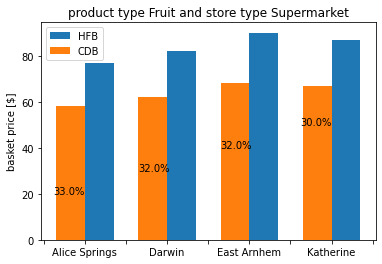

In [44]:
#Plot statistics for healthy/current diet baskets in Australia

import matplotlib.pyplot as plt
#HFB
#CDB

#print user chose - product type and store type by spliting the first word
store_type_name=lines_user[store_type].split('\t')[0]
product_type_name=lines_user[2].split('\t')[0]
print(product_type_name, store_type_name,sep='\n')

#merge list of HFB and CDB (healthy and current diet baskets)
list_HFB_CDB=[HFB,CDB]

fig, ax = plt.subplots()
n=1
for i in list_HFB_CDB:

  ind_basket_S = np.arange(len(i))  # the x locations for the cities
  width = 0.35  # the width of the bars
  
  #enter HFB or CDB
  basket_S=price_basket(i)
  print(basket_S)

  res = list(zip(*basket_S))
  print(res)
  x=res[1]
  res1=res[0]
  #y=[res1[0][1],res1[1][1],res1[2][1],res1[3][1]]
  y=res1
#set bars side-by-side for healthy food (HFB) & current diet basket
  if n==1:
    ax.bar(ind_basket_S+width/2,y, width, label='HFB')
    ax.set_xticklabels(('', '', res[1][0], '',res[1][1],'',res[1][2],'',res[1][3]))
    #ax.set_ylabel('basket price [$]')
    n+=1
  else:
    ax.bar(ind_basket_S-width/2,y, width, label='CDB')
    ax.set_ylabel('basket price [$]')
ax.set_title('product type {} and store type {}'.format(product_type_name,store_type_name))

#calculate average basket price
Avg_basket_price=average_cost_basket(HFB)
print('The average cost of the healthy food basket (HFB) is ${}'.format(Avg_basket_price))
Avg_basket_price=average_cost_basket(CDB)
print('The average cost of the current diet basket (CDB) is ${}'.format(Avg_basket_price))

#The city where the basket is most expensive
max_basket,city=most_expensive_basket(HFB)
print('The most expensive healthy food basket (HFB) is ${} located in {} '.format(max_basket,city))
max_basket,city=most_expensive_basket(CDB)
print('The most expensive current diet basket (CDB) is ${} located in {} '.format(max_basket,city))     

#The different in percentage between the CFB and the CDB
diff_cities=diff_in_basket_prices(HFB,CDB)
print(diff_cities)
print(res[1])

## sort results by the order of the cities in the graph
#and present the percent difference on the bar graph
diff_cities.sort(key = lambda i: res[1].index(i[0]))
plt.text(-0.38, 20, '{}%'.format(diff_cities[0][1]))
plt.text(0.65, 30, '{}%'.format(diff_cities[1][1]))
plt.text(1.65, 40, '{}%'.format(diff_cities[2][1]))
plt.text(2.62, 50, '{}%'.format(diff_cities[3][1]))


ax.legend(loc='upper left')